In [1]:
import pandas as pd
import numpy as np

from pathlib import Path
DATA_PATH = Path() / "../data"
DATA_PATH.mkdir(parents=True,exist_ok=True)

def load_csv(filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    return pd.read_csv(csv_path,encoding=encoding)

supplyChain = load_csv("DataCoSupplyChainDataset.csv", encoding='ISO-8859-1')

In [2]:
# data = pd.read_csv("../data/DataCoSupplyChainDataset.csv",encoding='ISO-8859-1')

In [3]:
supplyChain.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
data = supplyChain.iloc[:2000,:]
# data

In [5]:
data['order date']= pd.to_datetime(data['order date (DateOrders)'])
data['shipping date']= pd.to_datetime(data['shipping date (DateOrders)'])
data['order year']=data['order date'].dt.year
data['order month']=data['order date'].dt.month
data['order day']=data['order date'].dt.day
data['order hour']=data['order date'].dt.hour
data['order minute']=data['order date'].dt.minute

data['shipping year']=data['shipping date'].dt.year
data['shipping month']=data['shipping date'].dt.month
data['shipping day']=data['shipping date'].dt.day
data['shipping hour']=data['shipping date'].dt.hour
data['shipping minute']=data['shipping date'].dt.minute

/var/folders/wf/2r4hslkn0cv6g5b9rp14lh240000gn/T/ipykernel_18908/4223183766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['order date']= pd.to_datetime(data['order date (DateOrders)'])
/var/folders/wf/2r4hslkn0cv6g5b9rp14lh240000gn/T/ipykernel_18908/4223183766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['shipping date']= pd.to_datetime(data['shipping date (DateOrders)'])
/var/folders/wf/2r4hslkn0cv6g5b9rp14lh240000gn/T/ipykernel_18908/4223183766.py:3: SettingWithCopyWarning: 
A value

In [6]:
data_n=data.loc[:,['Type','Days for shipment (scheduled)','order year','order month','order day','order hour','order minute','Benefit per order','Category Name','Latitude','Longitude','Customer Segment','Department Name','Market','Order City','Order Country','Order Item Discount','Order Item Product Price','Order Item Quantity','Order Item Total','Order State','Product Name','shipping year','shipping month','shipping day','shipping hour','shipping minute','Shipping Mode','Late_delivery_risk','Order Status']]
data_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type                           2000 non-null   object 
 1   Days for shipment (scheduled)  2000 non-null   int64  
 2   order year                     2000 non-null   int64  
 3   order month                    2000 non-null   int64  
 4   order day                      2000 non-null   int64  
 5   order hour                     2000 non-null   int64  
 6   order minute                   2000 non-null   int64  
 7   Benefit per order              2000 non-null   float64
 8   Category Name                  2000 non-null   object 
 9   Latitude                       2000 non-null   float64
 10  Longitude                      2000 non-null   float64
 11  Customer Segment               2000 non-null   object 
 12  Department Name                2000 non-null   o

In [7]:
data_n['Order Status'].value_counts()

COMPLETE           647
PROCESSING         402
PENDING_PAYMENT    362
PENDING            266
SUSPECTED_FRAUD    107
ON_HOLD             73
CANCELED            64
CLOSED              59
PAYMENT_REVIEW      20
Name: Order Status, dtype: int64

In [8]:
data_n['Order Status']= [0 if i!='SUSPECTED_FRAUD' else 1 for i in data_n['Order Status']]

In [9]:
data_n['Order Status'].value_counts()

0    1893
1     107
Name: Order Status, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()
for i in data_n.columns:
    if data_n[i].dtype=='object':
        data_n[i]=enc.fit_transform(data_n[i])

In [11]:
data_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type                           2000 non-null   int64  
 1   Days for shipment (scheduled)  2000 non-null   int64  
 2   order year                     2000 non-null   int64  
 3   order month                    2000 non-null   int64  
 4   order day                      2000 non-null   int64  
 5   order hour                     2000 non-null   int64  
 6   order minute                   2000 non-null   int64  
 7   Benefit per order              2000 non-null   float64
 8   Category Name                  2000 non-null   int64  
 9   Latitude                       2000 non-null   float64
 10  Longitude                      2000 non-null   float64
 11  Customer Segment               2000 non-null   int64  
 12  Department Name                2000 non-null   i

In [13]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

y=data_n['Order Status']
X=data_n.drop(['Order Status'],axis=1)
name = X.columns
X=StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns=name)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply SMOTE to generate synthetic samples to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [14]:
y_resampled.value_counts()

0    1423
1    1423
Name: Order Status, dtype: int64

#### Feature Selection

Choosing Between MLflow and Auto-Sklearn

Use MLflow if you want to track experiments, version models, and have a comprehensive view of your model's lifecycle.

Use Auto-Sklearn if you want to automate the process of model and hyperparameter selection based on the given dataset, especially when you are unsure about which models or parameters to use.

This is a simple feature selection using random forest thus TPOT was not necessary, but keep as the fact the it has been tested.

In [15]:
import mlflow
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
# from sklearn.model_selection import train_test_split

mlflow.set_experiment('Feature_Selection_with_RFE')

with mlflow.start_run():
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rfe = RFE(estimator=rf_classifier, n_features_to_select=15, step=1)
    rfe.fit(X_train, y_train)
    
    # Transform the data
    X_train_rfe = rfe.transform(X_train)
    X_test_rfe = rfe.transform(X_test)
    
    # Train a new classifier on the transformed data
    rf_classifier.fit(X_train_rfe, y_train)
    
    # Evaluate the model
    score = rf_classifier.score(X_test_rfe, y_test)
    print(f"Model score after RFE: {score:.4f}")
    
    # Log parameters, metrics, and model
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("n_features_to_select", 15)
    mlflow.log_metric("accuracy", score)
    mlflow.sklearn.log_model(rf_classifier, "model")
    
    # Get and log the ranking of the features
    ranking = rfe.ranking_
    print(f"Feature ranking: {ranking}")
    mlflow.log_param("feature_ranking", ranking.tolist())

# To view the experiments, run the MLflow UI in terminal:
# mlflow ui


Model score after RFE: 0.9540
Feature ranking: [ 1 14 12  7  1  3  1  1  9  1  1 15 11  1  1  1  1  8  6  1  1  4 10  5
  1  1  1 13  2]


/Users/yanhuanhuang/anaconda3/envs/causalml-py38/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [16]:
# from tpot import TPOTClassifier

# tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
# tpot.fit(X_train, y_train)
# print(tpot.score(X_test, y_test))

# Export the best model pipeline
# tpot.export('tpot_classification_pipeline.py')

In [17]:
selected_features = name[rfe.support_]
print("Selected features:", selected_features.tolist())

Selected features: ['Type', 'order day', 'order minute', 'Benefit per order', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'Order Item Discount', 'Order Item Total', 'Order State', 'shipping day', 'shipping hour', 'shipping minute']


In [18]:
X_resampled_sel = X_resampled[selected_features.tolist()]
X_test_sel =  X_test[selected_features.tolist()]

#### H2O

In [19]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_401"; Java(TM) SE Runtime Environment (build 1.8.0_401-b10); Java HotSpot(TM) 64-Bit Server VM (build 25.401-b10, mixed mode)
  Starting server from /Users/yanhuanhuang/anaconda3/envs/causalml-py38/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/wf/2r4hslkn0cv6g5b9rp14lh240000gn/T/tmpm_1laxx0
  JVM stdout: /var/folders/wf/2r4hslkn0cv6g5b9rp14lh240000gn/T/tmpm_1laxx0/h2o_yanhuanhuang_started_from_python.out
  JVM stderr: /var/folders/wf/2r4hslkn0cv6g5b9rp14lh240000gn/T/tmpm_1laxx0/h2o_yanhuanhuang_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Toronto
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 10 days
H2O_cluster_name:,H2O_from_python_yanhuanhuang_80vds7
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.549 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [20]:
# transform df into a compatible data format
hf_dataset = h2o.H2OFrame(data_n)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [21]:
# ensure model will be on classification task
hf_dataset['Order Status'] = hf_dataset['Order Status'].asfactor()

In [22]:
# train test split
train, test = hf_dataset.split_frame(ratios=[0.75],seed=1)

y = 'Order Status'
X = hf_dataset.columns
X.remove(y)

In [23]:
h2o_aml = H2OAutoML(max_models = 12, seed = 1, exclude_algos = ["StackedEnsemble"], verbosity="info") #max_runtime_secs=120,

In [24]:
h2o_aml.train(x = X, y = y, training_frame = train)

AutoML progress: |
23:14:38.986: Project: AutoML_1_20240423_231438
23:14:38.987: 5-fold cross-validation will be used.
23:14:38.988: Setting stopping tolerance adaptively based on the training frame: 0.02577696311132335
23:14:38.988: Build control seed: 1
23:14:38.988: training frame: Frame key: AutoML_1_20240423_231438_training_py_3_sid_b680    cols: 30    rows: 1505  chunks: 1    size: 96637  checksum: 7305085373971510858
23:14:38.989: validation frame: NULL
23:14:38.989: leaderboard frame: NULL
23:14:38.989: blending frame: NULL
23:14:38.989: response column: Order Status
23:14:38.989: fold column: null
23:14:38.989: weights column: null
23:14:39.1: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {De

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_5_AutoML_1_20240423_231438


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    39                 39                          21975                  6            6            6             16            60            40.1795

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.005641158926278058
RMSE: 0.07510764891992065
LogLoss: 0.030785910923035155
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.23585902205539752
       0     1    Error    Rate
-----  ----  ---  -------  ------------
0      1429  0    0        (0.0/1429.0)
1      0     76   0        (0.0/76.0)
Total  1429  76   0        (0.0/1505.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.235859     1         74
max f2                       0.235859     1         74
max f0point5                 0.235859     1         74
max accuracy                 0.235859     1         74
max precision                0.944327     1         0
max recall                   0.235859     1         74
max specificity              0.944327     1         0
max absolute_mcc             0.235859     1         74
max min_per_class_accuracy   0.235859     1         74
max mean_per_class_accuracy  0.235859     1         74
max tns                      0.944327     1429      0
max fns                      0.944327     75        0
max fps                      0.00115026   1429      399
max tps                      0.235859     76        74
max tnr                      0.944327     1         0
max fnr                      0.944327     0.986842  0
max fpr                      0.00115026   1         399
max tpr                      0.235859     1         74

Gains/Lift Table: Avg response rate:  5.05 %, avg score:  5.01 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0106312                   0.886837           19.8026  19.8026            1                0.909643    1                           0.909643            0.210526        0.210526                   1880.26  1880.26            0.210526
2        0.020598                    0.786239           19.8026  19.8026            1                0.839063    1                           0.875491            0.197368        0.407895                   1880.26  1880.26            0.407895
3        0.0305648                   0.728731           19.8026  19.8026            1                0.755696    1                           0.836427            0.197368        0.605263                   1880.26  1880.26            0.605263
4        0.0405316                   0.600166           19.8026  19.8026            1                0.672207    1                           0.796045            0.197368        0.802632                   1880.26  1880.26            0.802632
5        0.0504983                   0.226895           19.8026  19.8026            1                0.476212    1                           0.73292             0.197368        1                          1880.26  1880.26            1
6 

In [25]:
# Retrieve the leaderboard
leaderboard = h2o_aml.leaderboard

# Extract model IDs
model_ids = leaderboard['model_id'].as_data_frame(use_pandas=True)['model_id']

# Loop through the models and print their confusion matrices
for model_id in model_ids:
    model = h2o.get_model(model_id)
    performance = model.model_performance(hf_dataset)
    print(f"Confusion Matrix for model {model_id}:")
    print(performance.confusion_matrix())

/Users/yanhuanhuang/anaconda3/envs/causalml-py38/lib/python3.8/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Confusion Matrix for model GBM_5_AutoML_1_20240423_231438:
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4414881072148971
       0     1    Error    Rate
-----  ----  ---  -------  -------------
0      1892  1    0.0005   (1.0/1893.0)
1      27    80   0.2523   (27.0/107.0)
Total  1919  81   0.014    (28.0/2000.0)
Confusion Matrix for model GBM_3_AutoML_1_20240423_231438:
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41096378047050897
       0     1    Error    Rate
-----  ----  ---  -------  -------------
0      1890  3    0.0016   (3.0/1893.0)
1      26    81   0.243    (26.0/107.0)
Total  1916  84   0.0145   (29.0/2000.0)
Confusion Matrix for model GBM_2_AutoML_1_20240423_231438:
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24514036329960434
       0     1    Error    Rate
-----  ----  ---  -------  -------------
0      1887  6    0.0032   (6.0/1893.0)
1      21    86   0.1963   (21.0/107.0)
Total  1908  92   0.0135   (27.0/2000.0)
Confusion Matrix for mo

In [26]:
# Access the best model
best_model = h2o_aml.leader

# Print a detailed summary of the model
print(best_model)

# Performance on training data
performance_train = best_model.model_performance(hf_dataset)

# Performance on a test set (if you have split your data)
performance_test = best_model.model_performance(test)

# Variable importance
variable_importance = best_model.varimp(use_pandas=True)
print(variable_importance)

# ROC curve (for classification)
roc_curve = performance_train.roc()


Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_5_AutoML_1_20240423_231438


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    39                 39                          21975                  6            6            6             16            60            40.1795

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.005641158926278058
RMSE: 0.07510764891992065
LogLoss: 0.030785910923035155
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.23585902205539752
       0     1    Error    Rate
-----  ----  ---  -------  ------------
0      1429  0    0        (0.0/1429.0)
1      0     76   0        

#### SHAP

In [27]:
best_model.get_params()

{'model_id': None,
 'training_frame': None,
 'validation_frame': None,
 'nfolds': 0,
 'keep_cross_validation_models': True,
 'keep_cross_validation_predictions': False,
 'keep_cross_validation_fold_assignment': False,
 'score_each_iteration': False,
 'score_tree_interval': 0,
 'fold_assignment': 'auto',
 'fold_column': None,
 'response_column': None,
 'ignored_columns': None,
 'ignore_const_cols': True,
 'offset_column': None,
 'weights_column': None,
 'balance_classes': False,
 'class_sampling_factors': None,
 'max_after_balance_size': 5.0,
 'max_confusion_matrix_size': 20,
 'ntrees': 50,
 'max_depth': 5,
 'min_rows': 10.0,
 'nbins': 20,
 'nbins_top_level': 1024,
 'nbins_cats': 1024,
 'r2_stopping': None,
 'stopping_rounds': 0,
 'stopping_metric': 'auto',
 'stopping_tolerance': 0.001,
 'max_runtime_secs': 0.0,
 'seed': -1,
 'build_tree_one_node': False,
 'learn_rate': 0.1,
 'learn_rate_annealing': 1.0,
 'distribution': 'auto',
 'quantile_alpha': 0.5,
 'tweedie_power': 1.5,
 'huber_alp

In [28]:
params = {
    'max_depth': best_model.params['max_depth']['actual'],
    'learning_rate': best_model.params['learn_rate']['actual'],
    'n_estimators': best_model.params['ntrees']['actual'],
    'subsample': best_model.params['sample_rate']['actual'],
    'colsample_bytree': best_model.params['col_sample_rate']['actual']
}

In [29]:
import xgboost as xgb

# Convert your dataset to DMatrix object
dtrain = xgb.DMatrix(X_resampled_sel, label=y_resampled)

# Set up XGBoost parameters (make sure to convert parameter names)
xgb_params = {
    'max_depth': params['max_depth'],
    'eta': params['learning_rate'],
    'subsample': params['subsample'],
    'colsample_bytree': params['colsample_bytree'],
    'objective': 'binary:logistic'  # or 'reg:squarederror' depending on your task
}

# Train the XGBoost model
xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=params['n_estimators'])


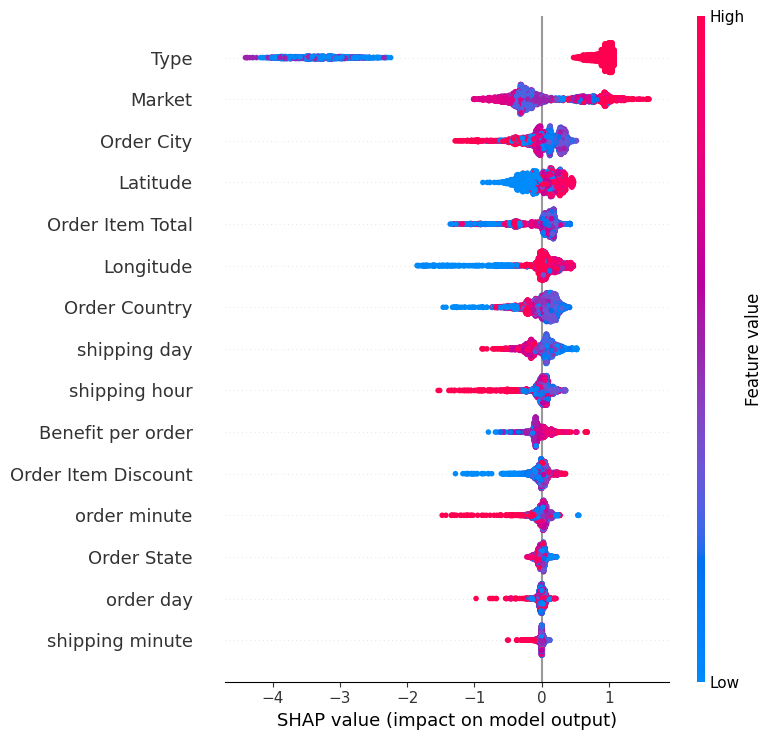

In [31]:
import shap

# Load JS visualization code to notebook
shap.initjs()

# retrieve model parameters
# best_xgb_model = grid_xgb.best_estimator_

# Explain the model's predictions using SHAP
explainer = shap.Explainer(xgb_model)

# Compute SHAP values
shap_values = explainer(X_resampled_sel)

shap.summary_plot(shap_values, X_resampled_sel)

In [32]:
# Load JS visualization code to the notebook
shap.initjs()

# Find indices where the label is 1
indices_label_1 = [i for i, label in enumerate(y_resampled) if label == 1]

instance_index = indices_label_1[0]  # Adjust this index to plot other instances
shap.force_plot(explainer.expected_value, shap_values.values[instance_index], feature_names=X_resampled_sel.columns)

In [33]:
indices_label_0 = [i for i, label in enumerate(y_resampled) if label == 0]

instance_index = indices_label_0[0]  # Adjust this index to plot other instances
shap.force_plot(explainer.expected_value, shap_values.values[instance_index], feature_names=X_resampled_sel.columns)

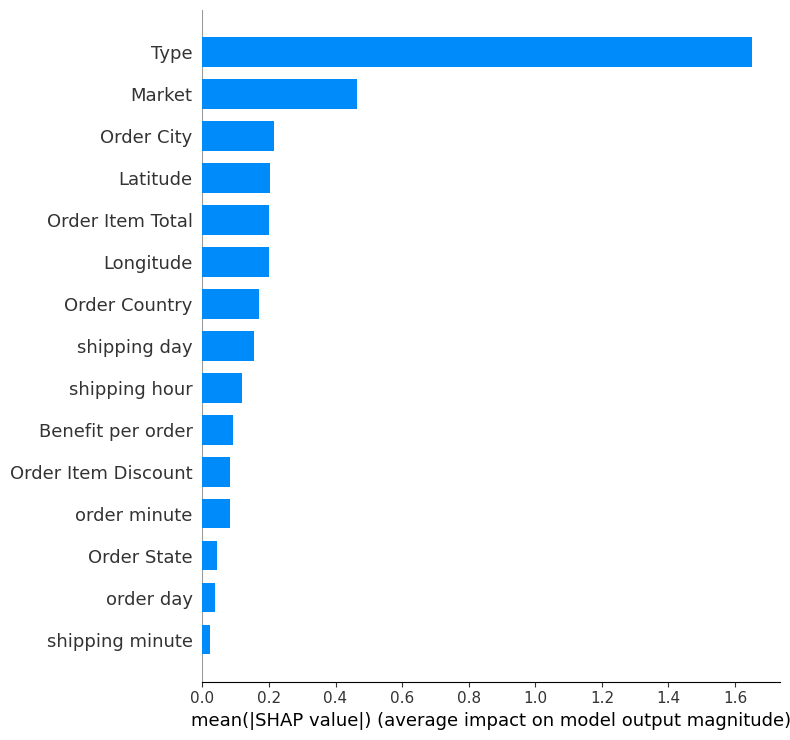

In [34]:
# Generate the summary plot
shap.summary_plot(shap_values, X_resampled_sel, plot_type="bar")
